In [ ]:
# Imports
!pip install datasets pandas
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
# Cargar el dataset
database = "amaiaruvi/news_racist_comments_spanish"
dataset = load_dataset(database)
dataset

Generating train split:   0%|          | 0/3005 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/438 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/851 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['link', 'title', 'comment', 'racist'],
        num_rows: 3005
    })
    validation: Dataset({
        features: ['link', 'title', 'comment', 'racist'],
        num_rows: 438
    })
    test: Dataset({
        features: ['link', 'title', 'comment', 'racist'],
        num_rows: 851
    })
})

In [ ]:
df_train = pd.DataFrame(dataset['train'])
df_validation = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

In [ ]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   link     3005 non-null   object
 1   title    3005 non-null   object
 2   comment  3005 non-null   object
 3   racist   3005 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 94.0+ KB


In [ ]:
df_validation.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   link     438 non-null    object
 1   title    438 non-null    object
 2   comment  438 non-null    object
 3   racist   438 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 13.8+ KB


In [ ]:
df_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   link     851 non-null    object
 1   title    851 non-null    object
 2   comment  851 non-null    object
 3   racist   851 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 26.7+ KB


In [ ]:
df_train['word_count'] = df_train['comment'].apply(lambda x: len(x.split()))
df_validation['word_count'] = df_validation['comment'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['comment'].apply(lambda x: len(x.split()))

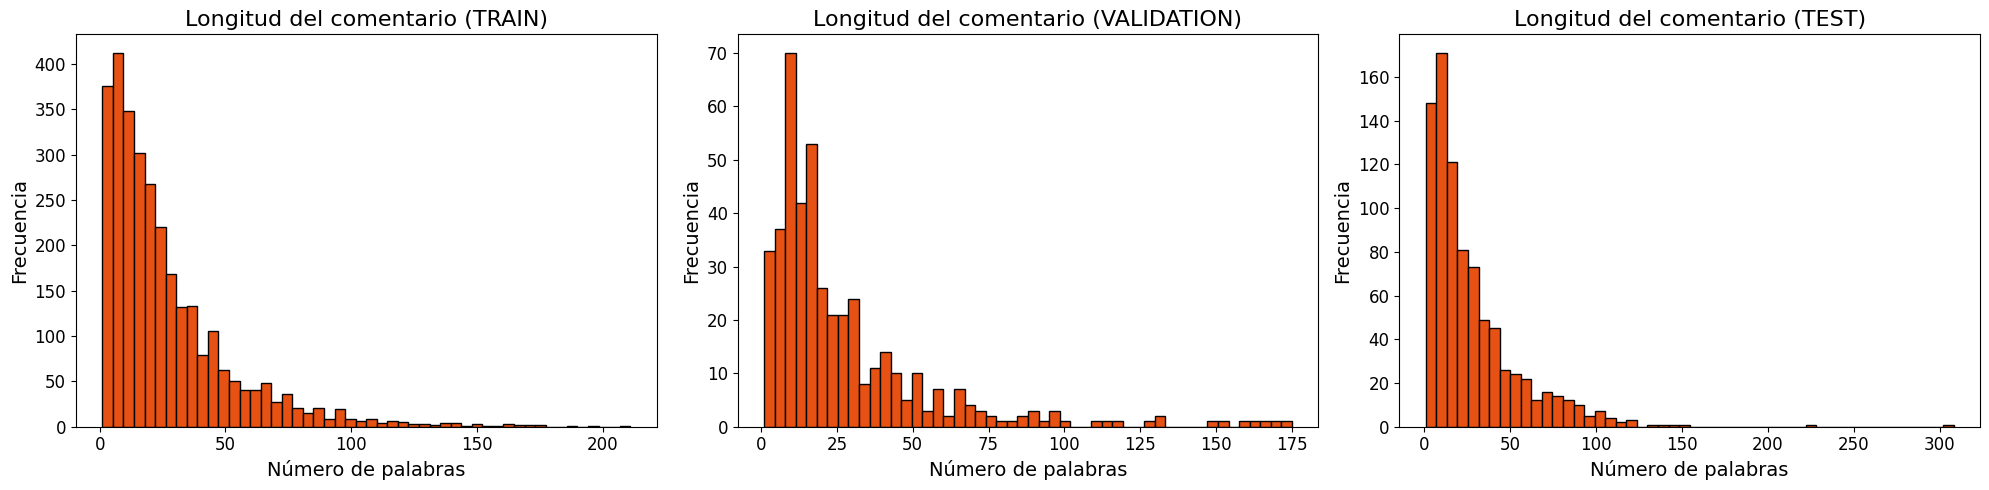

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].hist(df_train['word_count'], bins=50, color="#E75114", edgecolor='black')
axes[0].set_title('Longitud del comentario (TRAIN)', fontsize=16)
axes[0].set_xlabel('Número de palabras', fontsize=14)
axes[0].set_ylabel('Frecuencia', fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)

axes[1].hist(df_validation['word_count'], bins=50, color="#E75114", edgecolor='black')
axes[1].set_title('Longitud del comentario (VALIDATION)', fontsize=16)
axes[1].set_xlabel('Número de palabras', fontsize=14)
axes[1].set_ylabel('Frecuencia', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)

axes[2].hist(df_test['word_count'], bins=50, color="#E75114", edgecolor='black')
axes[2].set_title('Longitud del comentario (TEST)', fontsize=16)
axes[2].set_xlabel('Número de palabras', fontsize=14)
axes[2].set_ylabel('Frecuencia', fontsize=14)
axes[2].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

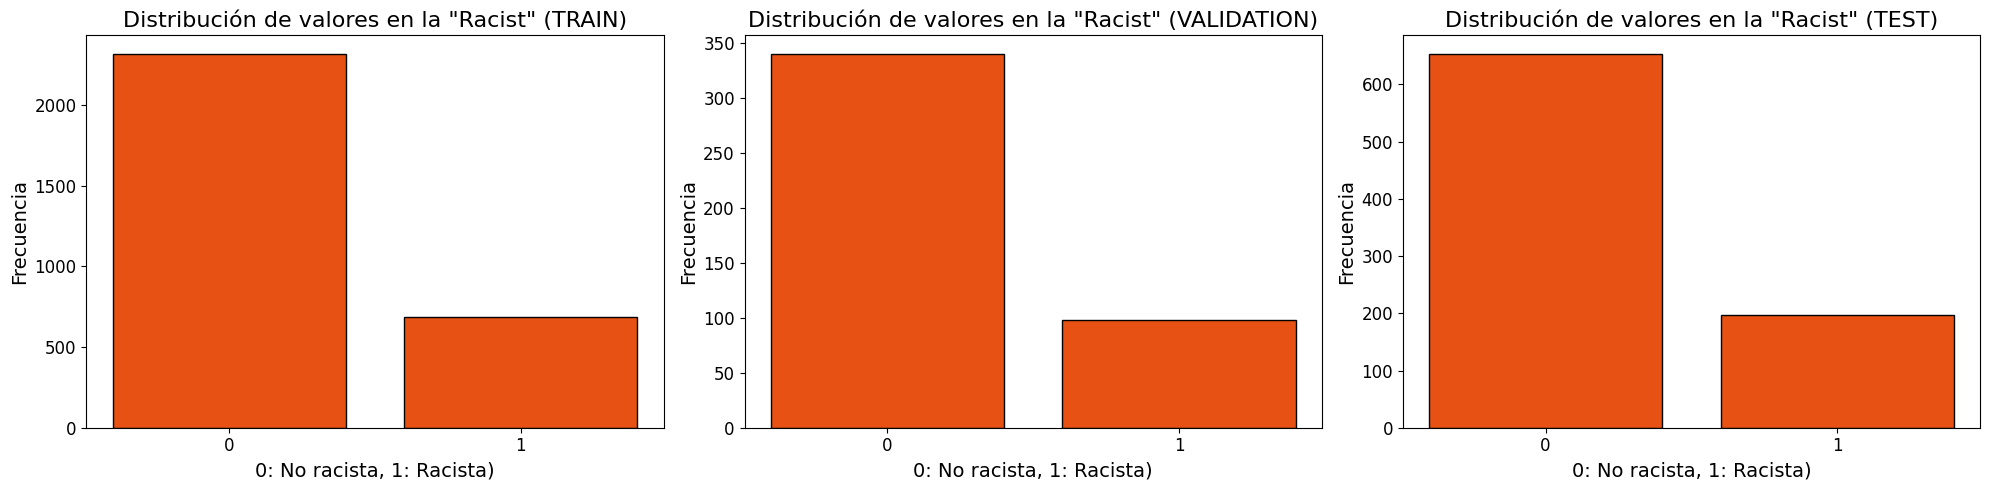

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

value_counts_train = df_train['racist'].value_counts()
axes[0].bar(value_counts_train.index, value_counts_train.values, color="#E75114", edgecolor='black')
axes[0].set_title('Distribución de valores en la "Racist" (TRAIN)', fontsize=16)
axes[0].set_xlabel('0: No racista, 1: Racista)', fontsize=14)
axes[0].set_ylabel('Frecuencia', fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'], fontsize=12)

value_counts_validation = df_validation['racist'].value_counts()
axes[1].bar(value_counts_validation.index, value_counts_validation.values, color="#E75114", edgecolor='black')
axes[1].set_title('Distribución de valores en la "Racist" (VALIDATION)', fontsize=16)
axes[1].set_xlabel('0: No racista, 1: Racista)', fontsize=14)
axes[1].set_ylabel('Frecuencia', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'], fontsize=12)

value_counts_test= df_test['racist'].value_counts()
axes[2].bar(value_counts_test.index, value_counts_test.values, color="#E75114", edgecolor='black')
axes[2].set_title('Distribución de valores en la "Racist" (TEST)', fontsize=16)
axes[2].set_xlabel('0: No racista, 1: Racista)', fontsize=14)
axes[2].set_ylabel('Frecuencia', fontsize=14)
axes[2].tick_params(axis='both', labelsize=12)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['0', '1'], fontsize=12)

plt.tight_layout()
plt.show()